In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp


The Freundlich adsorption model represents the multilayer adsorption of an adsorbent on a solid surface and is represented by the function (1).



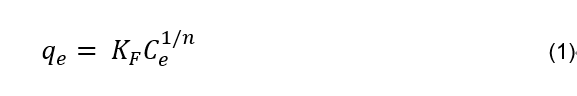

Ce is the concentration of As(III) in solution at equilibrium,qe is the concentration of As(III) in the adsorbent when the reaction reaches equilibrium and KF is the Freundlich constant, and n is experimentally determined constants


Combining predictive models of adsorption isotherms and adsorption kinetics to form an improved pseudo-second-order model for predictive modelling (shown in Function (2)). Furthermore, comparing the two modelling methods of batch and continuous treatment, the best solution, and suitable adsorbent concentration is found. 

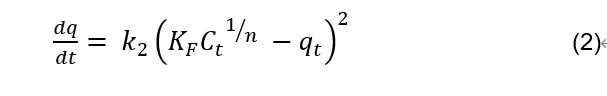

qe is the concentration of As(III) in the adsorbent when the reaction reaches equilibrium, qt is the quantity of arsenic adsorbed at time t,Ct is the concentration of aqueous As(III) at time t and k2 is the pseudo-second-order rate constant. 


Function (3) shows the equation for the reactor design model for batch treatment.

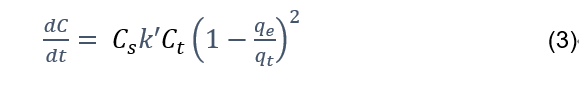

Where k’ is the rate constant,  Cs is sorbent concentrations


In [2]:
def DiffEq(conditions,t):
  
  time=t;

  j = exp[0][2];                # the reactor turnover rate 
  Cinfluent = exp[0][3];            # the inflow As(III) concentration 
  k = exp[0][4];                # rate constant
  Cs1 = exp[0][5];               # sorbent concentrations
  KF = exp[0][6];               # Freundlich constant
  n = exp[0][7];                # experimentally determined constants

  Ct = conditions[0]              # concentration of aqueous As(III) at time t 
  qt[i] = conditions[1]             # the quantity of arsenic adsorbed at time t 
  Ct_mgL = Ct/1000
  qt_mgg = qt[i]/(Cs1*1000)

 
  rate_ads = 1000*k*Ct_mgL*Cs1*((1-(qt_mgg/(KF*(Ct_mgL**(1/n)))))**2)  # batch treatment reactor design
  
  if Ct <0:
   Ct = 0.0001;   
   rate_ads=0;

  rate_influx = j*Cinfluent; 
  rate_outflux = j*Ct;
  dCdt = [-rate_ads+rate_influx-rate_outflux,rate_ads]         #batch treatment reactor design (when j=0)


  qt[i]=qt[i]+rate_ads
 
  

  return dCdt

Differential equations are equations containing unknown functions and their derivatives. ODEs are Ordinary Differential Equations (ODEs) with only one independent variable

scipy.integrate.odeint() is a specific method for solving differential equations, solving systems of ordinary differential equations by numerical integration

In [3]:

def Result_Processing (C_in,Cs0,days):
  
  global i
  global exp
  global qt
  qt=[0,0,0,0,0,0,0]
  number_of_experiments=7;
  number_of_variables = 8;
  results_table=[([0]*number_of_experiments) for i in range (10)]
  for day in range(1,days+1):
    C_init = C_in;           # sorbent concentrations (initial value) 
    q_init = qt;           # the quantity of arsenic adsorbed at time t (initial value)     
    Cs = Cs0;            # sorbent concentrations  
    Cinfluent = 0;          # the inflow As(III) concentration 
    j = 0;              # the reactor turnover rate 
    k = 0.1111;            # rate constant

    KF = 5.10;            # Freundlich constant

    n = 2.63;            # experimentally determined constants

    data_collect = [0,1,2,3,4,5,6,8,9,10,20,30,40,50,60,70,80,90,100,110,200,210,220,230,240,270,300,330,360,390,420,450,480,500,570,
                600,660,690,720,750,780,840,870,900,930,960,990,1000,1050,1080,1110,1140,
                1170,1200,1260,1290,1320,1350,1380,1410,1440]
    t_end = 1440
    
    t_steps = len(data_collect)
    t_step = t_end/t_steps;
    tt=list(np.arange(0,t_end+1,t_step))

  
    
    results_Ct=np.zeros((number_of_experiments,len(data_collect)))
    results_qt=np.zeros((number_of_experiments,len(data_collect)))
 
    experiments = [[0]*number_of_variables for _ in range(number_of_experiments)]
          
    for i in range(number_of_experiments) :
          experiments[i][0] = C_init;
          experiments[i][1] = q_init[i];
          experiments[i][2] = j;
          experiments[i][3] = Cinfluent;
          experiments[i][4] = k;
          experiments[i][5] = Cs*10**(i-4); #exponentially increasing sorbent concentration
          experiments[i][6] = KF;
          experiments[i][7] = n;   
 
    for i in range(number_of_experiments):
      
          exp = [[0]*number_of_variables for _ in range(1)]
          exp[0][:] = experiments[i][:]
          exp_C_init = exp[0][0]
          exp_q_init = exp[0][1]

          result = odeint(DiffEq,[exp_C_init,exp_q_init],data_collect)
    

          results_Ct[i,:] = result[:,0]
        
          for j in range(len(results_Ct[i,:])):
            if results_Ct[i,:][j]<=10 and data_collect[j] ==1:
              results_table[0][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] ==2:
              results_table[1][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] ==5:
              results_table[2][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [10]:
              results_table[3][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [20]:
              results_table[4][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [50]:
              results_table[5][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [100]:
              results_table[6][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [200]:
              results_table[7][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [500]:
              results_table[8][i]+=1

            if results_Ct[i,:][j]<=10 and data_collect[j] in [100]:
              results_table[9][i]+=1

          results_qt[i,:] = result[:,1]
    


  return results_Ct,data_collect,results_table
    

As boundary conditions for the volume of potable water required, we considered the needs of a rural family in West Bengal, India, with an average of 5.7 people per household . The WHO South-East Asia Technical Office reports that 7 L of water is required per person per day (4 L per capita per day (Lpcd) for drinking and 3 Lpcd for food preparation) . These two figures give a requirement of 40 L day−1 potable water per household. This is equivalent to 14,600 L per year per household, and where C0 = 500 μg L−1 As(III), equates to the 

In [4]:
def Min_adsorbent (result_counter):
  ads=[1,10,100,1000,10000]
  results=[0]*len(ads)
  for i in range(2,len(results_table[-1])):
    
    results[i-2]=(365/results_table[-1][i])*ads[i-2]*0.001*40
 
  return min(results)

In [5]:

results_Ct_1_5,data_collect1,_=Result_Processing (500,10,1)


results_Ct_25_5,data_collect1,_=Result_Processing (500,10,25)


results_Ct_50_5,data_collect1,_=Result_Processing (500,10,50)


results_Ct_75_5,data_collect1,_=Result_Processing (500,10,75)


results_Ct_100_5,data_collect1,_=Result_Processing (500,10,100)

results_Ct_150_5,data_collect1,_=Result_Processing (500,10,150)

In [6]:

results_Ct_5_2,data_collect2,_=Result_Processing (2000,10,5)


results_Ct_10_2,data_collect2,_=Result_Processing (2000,10,10)


results_Ct_25_2,data_collect2,_=Result_Processing (2000,10,25)


results_Ct_30_2,data_collect2,_=Result_Processing (2000,10,30)


results_Ct_45_2,data_collect2,_=Result_Processing (2000,10,45)


results_Ct_60_2,data_collect2,_=Result_Processing (2000,10,60)


In [7]:

results_Ct_100_5,data_collect3,_=Result_Processing (500,100,100)


results_Ct_150_5,data_collect3,_=Result_Processing (500,100,150)


results_Ct_200_5,data_collect3,_=Result_Processing (500,100,200)


results_Ct_250_5,data_collect3,_=Result_Processing (500,100,250)


results_Ct_300_5,data_collect3,_=Result_Processing (500,100,300)


results_Ct_365_5,data_collect3,results_table=Result_Processing (500,100,365)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [8]:

results_Ct_30_2,data_collect4,_=Result_Processing (2000,100,30)


results_Ct_40_2,data_collect4,_=Result_Processing (2000,100,40)


results_Ct_50_2,data_collect4,_=Result_Processing (2000,100,50)


results_Ct_60_2,data_collect4,_=Result_Processing (2000,100,60)


results_Ct_70_2,data_collect4,_=Result_Processing (2000,100,70)

results_Ct_80_2,data_collect4,_=Result_Processing (2000,100,80)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


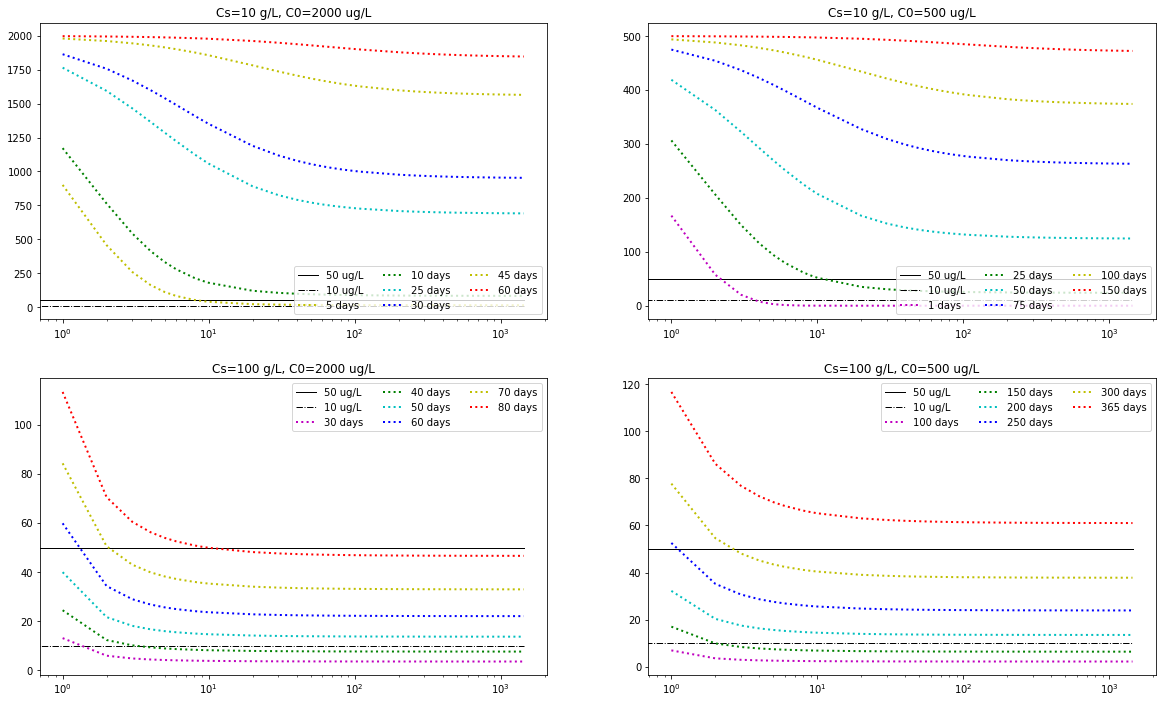

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(20, 12))

#Cs=10, C0=2000

ax[0, 0].plot(data_collect2, [50]*(len(data_collect2)), color='k', linestyle='-', linewidth=1,
           )

ax[0, 0].plot(data_collect2, [10]*(len(data_collect2)), color='k', linestyle='-.', linewidth=1,
           )


ax[0, 0].plot(data_collect2[1:], results_Ct_5_2[4][1:], color='y', linestyle=':', linewidth=2
        
        )
ax[0, 0].plot(data_collect2[1:], results_Ct_10_2[4][1:], color='g', linestyle=':', linewidth=2
       
        )
ax[0, 0].plot(data_collect2[1:], results_Ct_25_2[4][1:], color='c', linestyle=':', linewidth=2
      
       )

ax[0, 0].plot(data_collect2[1:], results_Ct_30_2[3][1:], color='b', linestyle=':', linewidth=2
       
       )

ax[0, 0].plot(data_collect2[1:], results_Ct_45_2[4][1:], color='y', linestyle=':', linewidth=2
      
       )

ax[0, 0].plot(data_collect2[1:], results_Ct_60_2[3][1:], color='r', linestyle=':', linewidth=2
      
       )

ax[0, 0].set_title('Cs=10 g/L, C0=2000 ug/L')
ax[0, 0].set_xscale('log')
ax[0, 0].legend(labels=['50 ug/L','10 ug/L','5 days',"10 days","25 days","30 days","45 days","60 days"], ncol=3,loc="lower right")

#Cs=10, C0=500
###########################################

ax[0, 1].plot(data_collect1, [50]*len(data_collect1), color='k', linestyle='-', linewidth=1,
           )

ax[0, 1].plot(data_collect1, [10]*len(data_collect1), color='k', linestyle='-.', linewidth=1,
           )


ax[0, 1].plot(data_collect1[1:], results_Ct_1_5[4][1:], color='m', linestyle=':', linewidth=2
        
        )
ax[0, 1].plot(data_collect1[1:], results_Ct_25_5[4][1:], color='g', linestyle=':', linewidth=2
       
        )
ax[0, 1].plot(data_collect1[1:], results_Ct_50_5[4][1:], color='c', linestyle=':', linewidth=2
      
       )

ax[0, 1].plot(data_collect1[1:], results_Ct_75_5[4][1:], color='b', linestyle=':', linewidth=2
       
       )

ax[0, 1].plot(data_collect1[1:], results_Ct_100_5[3][1:], color='y', linestyle=':', linewidth=2
      
       )

ax[0, 1].plot(data_collect1[1:], results_Ct_150_5[3][1:], color='r', linestyle=':', linewidth=2
      
       )

ax[0, 1].set_title('Cs=10 g/L, C0=500 ug/L')
ax[0, 1].legend(labels=['50 ug/L','10 ug/L','1 days',"25 days","50 days","75 days","100 days","150 days"], ncol=3,loc="lower right")
ax[0, 1].set_xscale('log')


#Cs=100, C0=500
###########################################

ax[1, 1].plot(data_collect3, [50]*len(data_collect3), color='k', linestyle='-', linewidth=1,
           )

ax[1, 1].plot(data_collect3, [10]*len(data_collect3), color='k', linestyle='-.', linewidth=1,
           )


ax[1, 1].plot(data_collect3[1:], results_Ct_100_5[4][1:], color='m', linestyle=':', linewidth=2
        
        )
ax[1, 1].plot(data_collect3[1:], results_Ct_150_5[4][1:], color='g', linestyle=':', linewidth=2
       
        )
ax[1, 1].plot(data_collect3[1:], results_Ct_200_5[4][1:], color='c', linestyle=':', linewidth=2
      
       )

ax[1, 1].plot(data_collect3[1:], results_Ct_250_5[4][1:], color='b', linestyle=':', linewidth=2
       
       )

ax[1, 1].plot(data_collect3[1:], results_Ct_300_5[4][1:], color='y', linestyle=':', linewidth=2
      
       )

ax[1, 1].plot(data_collect3[1:], results_Ct_365_5[4][1:], color='r', linestyle=':', linewidth=2
      
       )
ax[1, 1].set_title('Cs=100 g/L, C0=500 ug/L')
ax[1, 1].legend(labels=['50 ug/L','10 ug/L','100 days',"150 days","200 days","250 days","300 days","365 days"], ncol=3,loc="upper right")
ax[1, 1].set_xscale('log')


#Cs=100, C0=2000
###########################################

ax[1, 0].plot(data_collect4, [50]*len(data_collect4), color='k', linestyle='-', linewidth=1,
           )

ax[1, 0].plot(data_collect4, [10]*len(data_collect4), color='k', linestyle='-.', linewidth=1,
           )


ax[1, 0].plot(data_collect4[1:], results_Ct_30_2[4][1:], color='m', linestyle=':', linewidth=2
        
        )
ax[1, 0].plot(data_collect4[1:], results_Ct_40_2[4][1:], color='g', linestyle=':', linewidth=2
       
        )
ax[1, 0].plot(data_collect4[1:], results_Ct_50_2[4][1:], color='c', linestyle=':', linewidth=2
      
       )

ax[1, 0].plot(data_collect4[1:], results_Ct_60_2[4][1:], color='b', linestyle=':', linewidth=2
       
       )

ax[1, 0].plot(data_collect4[1:], results_Ct_70_2[4][1:], color='y', linestyle=':', linewidth=2
      
       )

ax[1, 0].plot(data_collect4[1:], results_Ct_80_2[4][1:], color='r', linestyle=':', linewidth=2
      
       )
ax[1, 0].set_title('Cs=100 g/L, C0=2000 ug/L')
ax[1, 0].legend(labels=['50 ug/L','10 ug/L','30 days',"40 days","50 days","60 days","70 days","80 days"], ncol=3,loc="upper right")
ax[1, 0].set_xscale('log')

plt.show()

In [10]:
results=Min_adsorbent(results_table[-1])

In [11]:
print(results)

8.248587570621469
